# Predict New Born Babies Weight Using Linear Regression implemented from scratch

* Author: Vivek_Nambidi

###  Import all the necessary packages here


In [1]:
# Import all the packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from scipy.stats import skew, kurtosis
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

%matplotlib inline

### Load the dataset into memory so that you can play with it here

In [2]:
# Load baby-weight-dataset2.csv into a dataframe
babyWeightDF = pd.read_csv("baby-weights-dataset2.csv")
print ("Number of dimensions:",babyWeightDF.ndim,"\n")
print("Shape of the data frame:",babyWeightDF.shape,"\n")
print("Number of rows:",len(babyWeightDF.index),"\n")
print("Number of columns:",len(babyWeightDF.columns),"\n")
print("Target Label:",babyWeightDF.columns[-1])

Number of dimensions: 2 

Shape of the data frame: (101400, 37) 

Number of rows: 101400 

Number of columns: 37 

Target Label: BWEIGHT


In [3]:
babyWeightDF.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60,13,20,12,14,2,...,0,1,0,0,0,0,0,0,0,9.0000


In [4]:
# Print all the Dataframe Information 
babyWeightDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
ID          101400 non-null int64
SEX         101400 non-null int64
MARITAL     101400 non-null int64
FAGE        101400 non-null int64
GAINED      101400 non-null int64
VISITS      101400 non-null int64
MAGE        101400 non-null int64
FEDUC       101400 non-null int64
MEDUC       101400 non-null int64
TOTALP      101400 non-null int64
BDEAD       101400 non-null int64
TERMS       101400 non-null int64
LOUTCOME    101400 non-null int64
WEEKS       101400 non-null int64
RACEMOM     101400 non-null int64
RACEDAD     101400 non-null int64
HISPMOM     101400 non-null object
HISPDAD     101400 non-null object
CIGNUM      101400 non-null int64
DRINKNUM    101400 non-null int64
ANEMIA      101400 non-null int64
CARDIAC     101400 non-null int64
ACLUNG      101400 non-null int64
DIABETES    101400 non-null int64
HERPES      101400 non-null int64
HYDRAM      101400 non-null int64
HEM

###  Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [5]:
# Compute mean, stddev,min,max,percentile,median of BWEIGHT variable: 
Bweight = pd.DataFrame(babyWeightDF['BWEIGHT'])
print(Bweight.describe(percentiles=[.25,.75]),"\nmedian\t ",babyWeightDF['BWEIGHT'].median())

             BWEIGHT
count  101400.000000
mean        7.258066
std         1.329461
min         0.187500
25%         6.625000
50%         7.375000
75%         8.062500
max        13.062500 
median	  7.375


### Histogram plot for the BWEIGHT variable


C:\Users\mrviv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


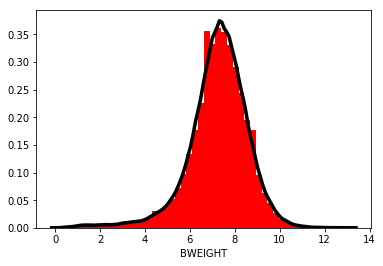

In [6]:
# Plot the histogram: 
sns.distplot(babyWeightDF['BWEIGHT'],kde_kws={"color": "k", "lw": 3.5},hist_kws={ "linewidth": 1,"alpha": 1, "color": "r"})

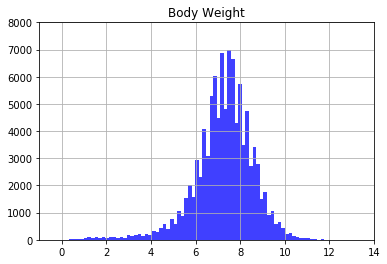

In [7]:
# Plot histogram using MATPLOTLIB
plt.hist(babyWeightDF['BWEIGHT'],80,histtype = ('bar'),facecolor='b', alpha=0.75)
plt.axis([-1,14,0,8000])
plt.title('Body Weight')
plt.grid(True)
plt.show()

### The skewness and kurtosis of the BWEIGHT target variable

In [8]:
print("skewness using scipy:",skew(babyWeightDF['BWEIGHT'].dropna()))
print("skewness using pandas:",babyWeightDF['BWEIGHT'].skew(skipna=True))
print("Kurtosis using scipy:", kurtosis(babyWeightDF['BWEIGHT'].dropna()))
print("Kurtosis using pandas:", babyWeightDF['BWEIGHT'].kurtosis(skipna=True))

skewness using scipy: -0.9365796191651633
skewness using pandas: -0.9365934741551449
Kurtosis using scipy: 2.868579195051929
Kurtosis using pandas: 2.8687798226840977


### Tackling the dummy categorical variables by introducing dummy variables

In [9]:
# Creating Dummy Variables for HISPMOM and HISPDAD
# First dummy variable column is dropped to prevent dummy variable trap
# for K categorical variable , k-1 dummy variables are needed
dummyColumns_DF = pd.get_dummies(babyWeightDF, columns = ['HISPMOM', 'HISPDAD'], drop_first = True)

# Concatinating new columns to old DataFrame
concatinate_DF = pd.concat([babyWeightDF, dummyColumns_DF ], axis = 1)

# Dropping the columns with categorical values: 
concatinate_DF.drop('HISPDAD', axis =1, inplace = True)
concatinate_DF.drop('HISPMOM', axis =1, inplace = True)

# Display the new DataFrame
print(concatinate_DF.head())

     ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  \
0  2001    2        1    33      26      10    34     12      4       2   
1  2002    2        2    19      40      10    18     11     12       1   
2  2003    2        1    33      16      14    31     16     16       2   
3  2004    1        1    25      40      15    28     12     12       3   
4  2005    1        2    21      60      13    20     12     14       2   

     ...      HISPMOM_O  HISPMOM_P  HISPMOM_S  HISPMOM_U  HISPDAD_M  \
0    ...              0          0          0          0          1   
1    ...              0          0          0          0          0   
2    ...              0          0          0          0          0   
3    ...              0          0          0          0          0   
4    ...              0          0          0          0          0   

   HISPDAD_N  HISPDAD_O  HISPDAD_P  HISPDAD_S  HISPDAD_U  
0          0          0          0          0          0  
1   

###  Doing variable selection from the pool of 36 variables based on correlation score with the target variable BWEIGHT 
### reporting all the variables kept for training.

In [10]:
# Compute the correlation and plot the correlation 
babyWeightDF.corr(method='kendall').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('Spectral'), axis=1)

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,RACEMOM,RACEDAD,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
ID,1.0,-0.0021,-0.000652,0.000179,-0.0028,-0.00093,0.00185,0.00176,0.00258,0.00363,0.00256,0.0048,-0.00395,0.00418,0.00475,0.00208,0.00138,-0.00391,-0.000937,0.00237,-0.00188,-8.95e-05,-0.00127,-0.00324,0.00237,0.00247,-0.00307,-0.000941,0.00303,0.000262,0.00776,0.00258,-0.000255,-0.00148,0.000847
SEX,-0.0021,1.0,-0.000132,-0.000428,-0.0242,0.000129,-0.00384,-0.000219,0.000318,-0.00724,-0.00387,-0.0068,0.00189,0.0224,0.00421,0.00665,-0.00214,-0.00428,0.00915,0.00628,0.0026,0.000525,-0.00452,0.00173,0.00119,0.0034,-0.00642,-0.00431,0.000632,-0.000711,-0.00233,8.25e-05,0.00354,-0.00387,-0.0899
MARITAL,-0.000652,-0.000132,1.0,-0.292,-0.00432,-0.137,-0.341,-0.348,-0.361,-0.0701,-0.00403,-0.0144,0.101,-0.000459,0.195,0.234,0.157,-0.00127,0.0393,-0.00954,0.0234,-0.0213,0.0163,0.0139,0.0234,-0.00959,0.00958,0.00513,-0.00532,-0.0231,-0.00271,0.00163,-0.00327,0.00182,-0.0969
FAGE,0.000179,-0.000428,-0.292,1.0,-0.0351,0.0762,0.618,0.269,0.267,0.233,0.0319,0.104,-0.2,-0.0371,-0.0411,-0.0562,-0.0636,0.0203,-0.0203,0.00989,-0.011,0.0525,0.0141,-0.0019,-0.00416,0.0428,-0.0108,-0.00361,0.0162,0.032,0.0211,-0.00301,0.00195,0.00461,0.0501
GAINED,-0.0028,-0.0242,-0.00432,-0.0351,1.0,0.0698,-0.038,0.0757,0.0723,-0.11,-0.0147,-0.00955,0.121,0.0559,-0.0405,-0.0358,-0.00201,0.00391,-0.00285,-1.55e-05,0.00196,-0.0437,0.0127,-0.00454,-0.0101,-0.0271,0.0443,0.0144,-0.00777,0.0092,-0.0201,-0.00106,0.00403,-0.0036,0.118
VISITS,-0.00093,0.000129,-0.137,0.0762,0.0698,1.0,0.0979,0.157,0.172,-0.0479,-0.004,0.0224,0.0563,0.0808,-0.0255,-0.0275,-0.0495,-0.00362,-0.0382,0.00304,-0.021,0.0347,-0.00496,-0.00826,-0.012,0.0143,0.00811,-0.0123,0.00975,-0.00518,-0.00885,-0.00629,-0.00208,-0.0127,0.078
MAGE,0.00185,-0.00384,-0.341,0.618,-0.038,0.0979,1.0,0.309,0.348,0.275,0.0323,0.132,-0.225,-0.0499,-0.0555,-0.0798,-0.0973,0.0218,-0.0224,0.0116,-0.0148,0.0673,0.0123,-0.00482,-0.00742,0.0508,-0.00549,-0.00196,0.0179,0.0356,0.0203,-0.00564,0.000644,0.00665,0.0619
FEDUC,0.00176,-0.000219,-0.348,0.269,0.0757,0.157,0.309,1.0,0.618,-0.061,-0.0188,0.0157,0.046,0.00609,0.00218,-0.009,-0.147,0.0161,-0.0222,0.00699,-0.0105,-0.0104,0.00468,-0.0127,-0.00685,-0.00434,-0.0131,-0.00484,0.00701,0.00817,-0.00597,-0.0042,0.00437,0.00451,0.0581
MEDUC,0.00258,0.000318,-0.361,0.267,0.0723,0.172,0.348,0.618,1.0,-0.0861,-0.0223,0.0222,0.0694,0.00396,0.00155,-0.0182,-0.162,0.0172,-0.0237,0.011,-0.00884,-0.00374,0.0094,-0.00762,-0.00591,0.00867,0.000655,-0.00268,0.00947,0.00825,-0.0079,-0.00375,0.00432,0.00493,0.0623
TOTALP,0.00363,-0.00724,-0.0701,0.233,-0.11,-0.0479,0.275,-0.061,-0.0861,1.0,0.124,0.511,-0.626,-0.0866,0.0323,0.0356,0.0581,0.00675,0.0151,0.000965,0.00483,0.0389,0.012,-0.0143,0.00765,0.0222,-0.0454,-0.0131,0.032,0.0568,0.0753,-0.000187,0.000325,0.00419,0.0206


#### Since the result of this is a dataframe, we can index it and only get the correlations for the BWEIGHT column

In [11]:
correlation = babyWeightDF.corr(method='kendall')["BWEIGHT"]
print("Correlation for BWEIGHT with the rest of variable columns:\n",correlation )

Correlation for BWEIGHT with the rest of variable columns:
 ID          0.000847
SEX        -0.089929
MARITAL    -0.096860
FAGE        0.050065
GAINED      0.118100
VISITS      0.077982
MAGE        0.061877
FEDUC       0.058074
MEDUC       0.062291
TOTALP      0.020575
BDEAD      -0.019223
TERMS      -0.007801
LOUTCOME   -0.036858
WEEKS       0.289657
RACEMOM    -0.129260
RACEDAD    -0.125513
CIGNUM     -0.096220
DRINKNUM   -0.004176
ANEMIA     -0.009995
CARDIAC    -0.000621
ACLUNG     -0.006592
DIABETES    0.007603
HERPES      0.000157
HYDRAM     -0.039629
HEMOGLOB   -0.010313
HYPERCH    -0.028247
HYPERPR    -0.076499
ECLAMP     -0.042238
CERVIX     -0.036151
PINFANT     0.055371
PRETERM    -0.051446
RENAL      -0.005090
RHSEN       0.002317
UTERINE    -0.020544
BWEIGHT     1.000000
Name: BWEIGHT, dtype: float64


#### Plotting the relation between Feature variables which shows Correlation greater than 0 with BWEIGHT to see their relationship:

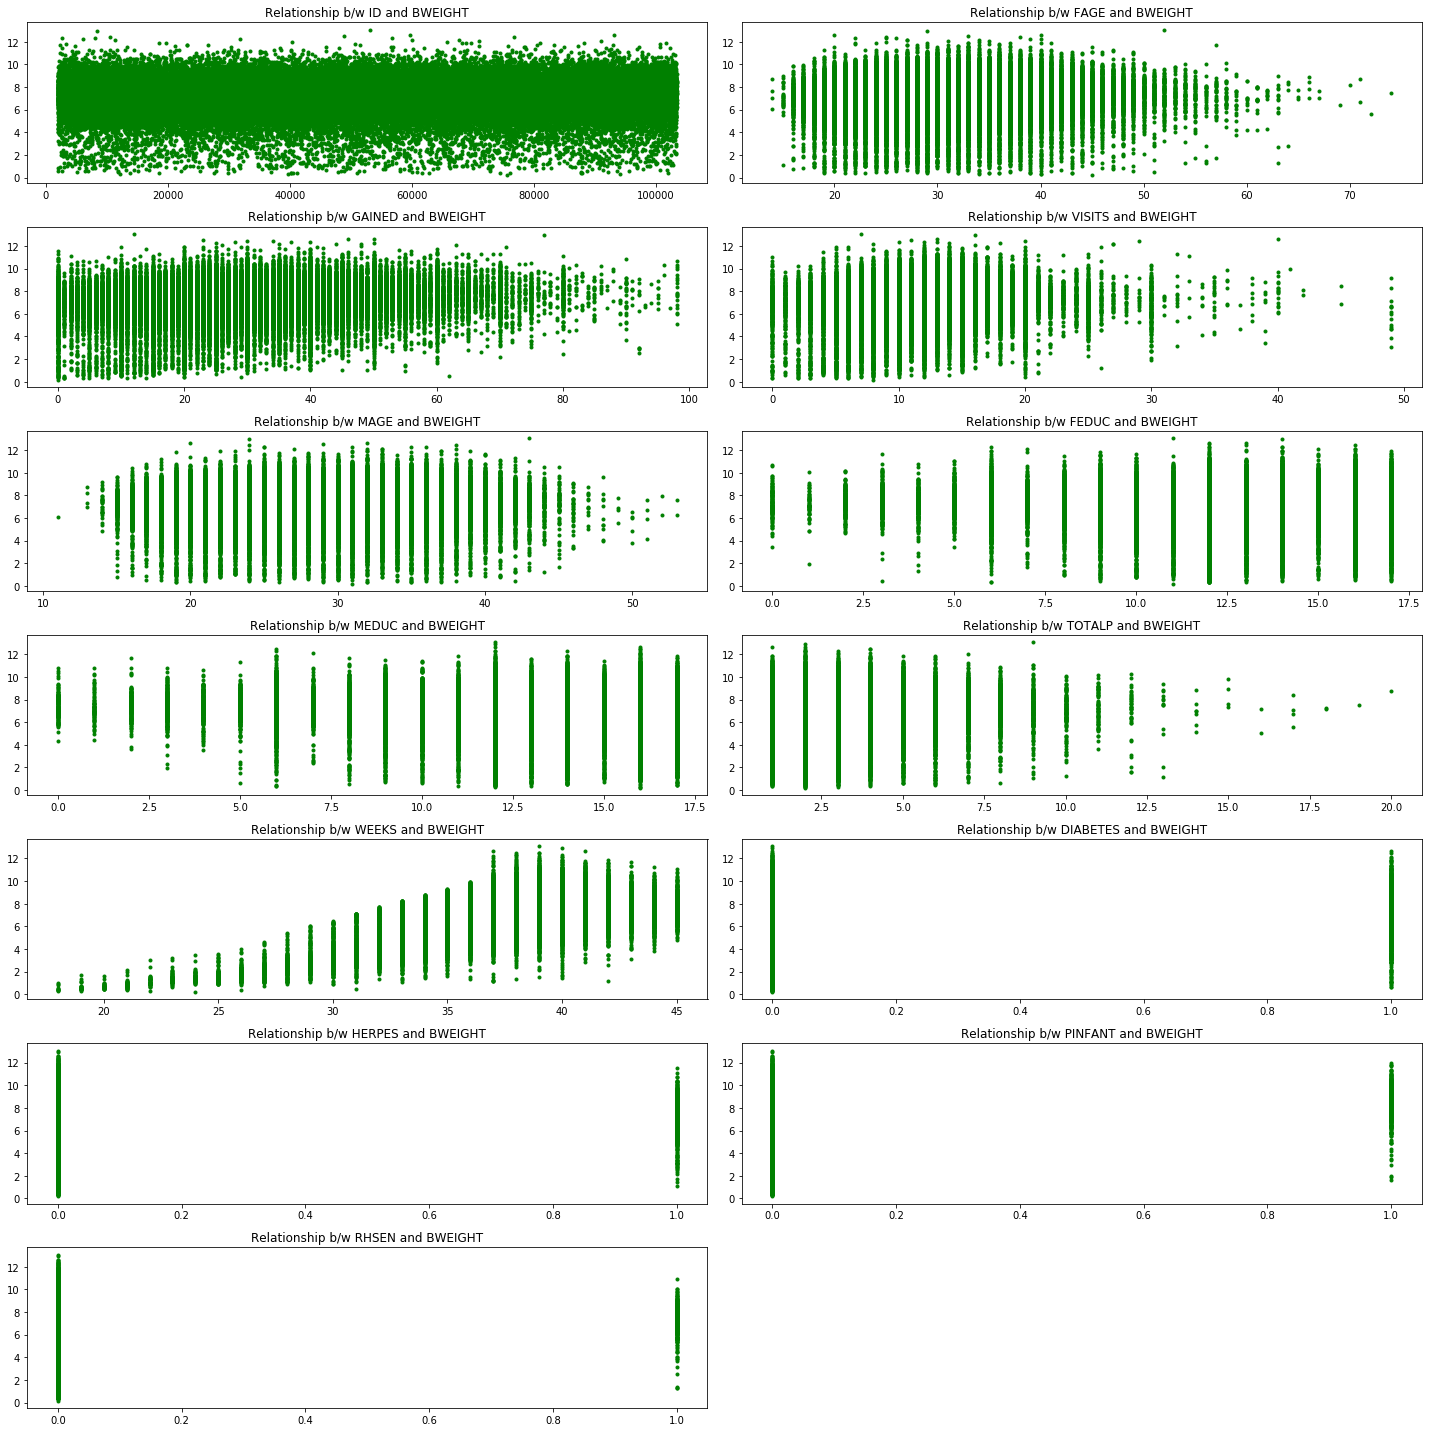

In [12]:
def plot_FeatureRelation(featureList,title):
    plt.figure(figsize=(20,20))
    index = 0
    for feature in featureList:
        index +=1
        plt.subplot(7,2,index)
        plt.plot(babyWeightDF[feature],babyWeightDF['BWEIGHT'],marker='.',linestyle='none',color='g')
        plt.title(title % (feature))   
        plt.tight_layout()

featureList = ['ID','FAGE','GAINED','VISITS','MAGE','FEDUC','MEDUC','TOTALP','WEEKS','DIABETES','HERPES','PINFANT','RHSEN']
#featureList = ['ID','SEX','MARITAL','FAGE','GAINED','VISITS','MAGE','FEDUC','MEDUC','TOTALP','WEEKS','DIABETES','HERPES','HYDRAM','HEMOGLOB','HYPERCH','HYPERPR','ECLAMP','CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
plot_FeatureRelation(featureList,"Relationship b/w %s and BWEIGHT")

#### Taking only columns with strong positive correlation with the BWEIGHT Target Variables:

In [13]:
x = babyWeightDF[['ID','FAGE','GAINED','VISITS','MAGE','FEDUC','MEDUC','TOTALP','WEEKS']].values
# Target Variable: 
Y = babyWeightDF[['BWEIGHT']].values
#print("Variable Columns used for training:\n",x.columns,"\n")
#print("Target Variable:\n",Y.columns,"\n")

###  Checking for missing data, and applying a strategy to tackle it

#### Replacing Missing Values with mean of the particular feature

In [14]:
# Replace the missing Values with the mean of the feature
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(x)
x = imputer.transform(x)

#### Replacing missing values by removing the rows containing the missing values

In [15]:
# Drop the missing Values to tackle the missing values 
# x = x.dropna(inplace = True)
# x.isnull().sum()

### Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [16]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, Y, test_size=0.2, random_state=101)
print("Information regarding training and testing data set:\n")
print("Shape of Input Train Data:",x_Train.shape)
print("Shape of Input Test Data:",x_Test.shape)
print("Shape of Target Train Data:",y_Train.shape)
print("Shape of Target Test Data:",y_Test.shape)

Information regarding training and testing data set:

Shape of Input Train Data: (81120, 9)
Shape of Input Test Data: (20280, 9)
Shape of Target Train Data: (81120, 1)
Shape of Target Test Data: (20280, 1)


###  On the training dataset, apply a normalization technique

#### Normalization using MinMax Scaler

In [17]:
#MinMaxScaler:-
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# Features are transformed by scaling each feature to given range. 
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_X_Train = MinMax_Scaler.fit_transform(x_Train)
print("Shape of Scaled/Normalized Train Data:",scaled_X_Train.shape)

Shape of Scaled/Normalized Train Data: (81120, 9)


### Apply the training data statistics to normalize the testing data as well.

In [18]:
scaled_X_Test = MinMax_Scaler.transform(x_Test)
print("Shape of Scaled/Normalized Test Data:",scaled_X_Test.shape)

Shape of Scaled/Normalized Test Data: (20280, 9)


###  Linear Regression

#### Function to extrach the batch sized data

In [19]:
def next_batch(X,y, batchSize):
    for i in range(0, X.shape[0], batchSize):
        yield (X[i:i+ batchSize], y[i:i+batchSize])
        
def sigmoid_activation(x):
    return 1.0/ (1+ np.exp(-x))

#### Function to compute the Gradient Descent Linear Regression  (Batch)

In [20]:
def GradientDescent_LinearRegression(InputData, TargetData, learning_Rate, noof_Epochs,batchSize):
    
    InputData = np.column_stack((np.ones(InputData.shape[0]),InputData))   
    #InputData = np.c_[np.ones((InputData.shape[0])), InputData]
    print("[INFO] start training....")
    # Initialize weights with random values 
    W = np.random.uniform(size=(InputData.shape[1],1))
    # Create a list to store the value of loss
    lossHistory = []

    for epoch in range(0, noof_Epochs):
        epochLoss = []
        for (batchX, batchY)  in next_batch(InputData,TargetData,batchSize):
            # Prediction = dot product of Weights and batch of X
            preds = batchX.dot(W)
            # Error = Prediction - Actual ( batch of Y)
            error = preds - batchY
            # Compute Square root ( sum of ( Square of error))
            loss= np.sum(error**2)
            loss = np.sqrt(loss)
            #print("[INFO] epoch #{}, loss={}".format(epoch + 1, loss))
            epochLoss.append(loss)
            # Compute Gradient and Update the Weights 
            gradient = batchX.T.dot(error)/batchX.shape[0]
            W += -learning_Rate* gradient 
        
        print("[INFO] epoch #{}, loss={}".format(epoch + 1, loss))    
        # Append loss history list by taking average across all batches
        lossHistory.append(np.average(epochLoss))
    return lossHistory, W

In [21]:
# Call the function and return the Loss and weights:-
Learning_Rate = 0.001
noof_epochs = 100
batchSize = 32
Loss, Weights = GradientDescent_LinearRegression(scaled_X_Train, y_Train,Learning_Rate, noof_epochs, batchSize)

[INFO] start training....
[INFO] epoch #1, loss=8.493670655944358
[INFO] epoch #2, loss=8.248491576267597
[INFO] epoch #3, loss=8.036824122020095
[INFO] epoch #4, loss=7.8532979282393685
[INFO] epoch #5, loss=7.693692933851088
[INFO] epoch #6, loss=7.554487215863316
[INFO] epoch #7, loss=7.4327273903783695
[INFO] epoch #8, loss=7.3259262087914925
[INFO] epoch #9, loss=7.231981083324186
[INFO] epoch #10, loss=7.149108777357042
[INFO] epoch #11, loss=7.075792635822083
[INFO] epoch #12, loss=7.010739607148835
[INFO] epoch #13, loss=6.952844972483436
[INFO] epoch #14, loss=6.901163196567906
[INFO] epoch #15, loss=6.854883686923501
[INFO] epoch #16, loss=6.813310525329309
[INFO] epoch #17, loss=6.775845442531329
[INFO] epoch #18, loss=6.741973462247963
[INFO] epoch #19, loss=6.711250757690195
[INFO] epoch #20, loss=6.683294353142784
[INFO] epoch #21, loss=6.657773372033984
[INFO] epoch #22, loss=6.634401586687609
[INFO] epoch #23, loss=6.6129310674424175
[INFO] epoch #24, loss=6.59314676281

In [22]:
# Compute the line of best fit by setting the sigmod function to 0 and solving X2 in terms of X1
Y = (-Weights[0] - (Weights[1] * scaled_X_Train)) / Weights[2]

#### Plotting the Training Loss Vs Epochs

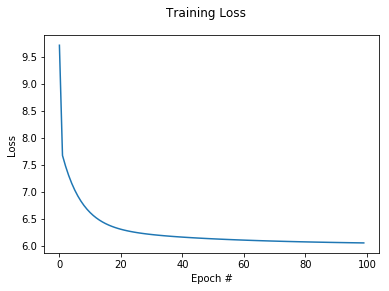

In [23]:
fig = plt.figure()
plt.plot(np.arange(0,noof_epochs), Loss)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

#### Another attempt : Using only one Feature column: "WEEKS" from the data set which has highest correlation (+ve linear relationship) with the target BWEIGHT 

Iteration: 1,Cost = 7.493304673085035,weight = [0.00725807 0.28302824]


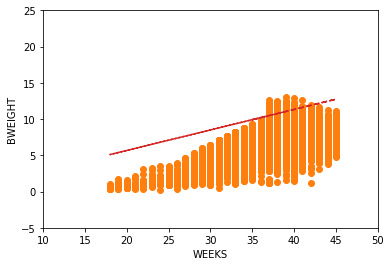

Iteration: 1001,Cost = 0.6406677469867713,weight = [-0.01334013  0.18818661]


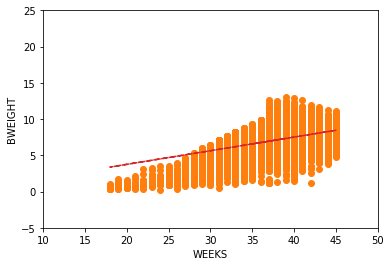

Iteration: 2001,Cost = 0.6403409132081768,weight = [-0.03141271  0.18865124]


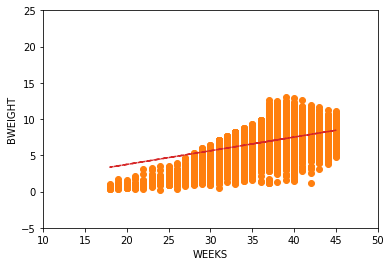

Iteration: 3001,Cost = 0.6400167888115472,weight = [-0.04941023  0.18911393]


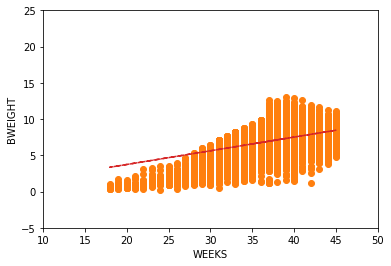

Iteration: 4001,Cost = 0.6396953513367393,weight = [-0.06733299  0.1895747 ]


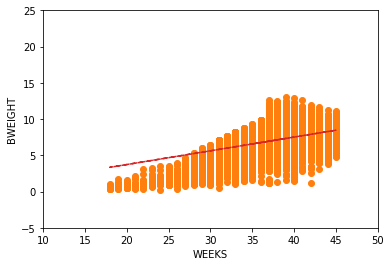

Iteration: 5001,Cost = 0.6393765785096664,weight = [-0.08518131  0.19003355]


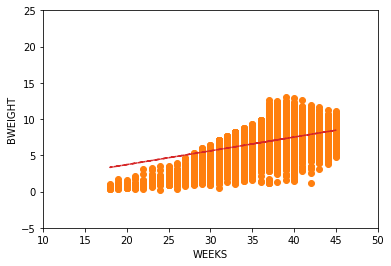

Iteration: 6001,Cost = 0.6390604482410586,weight = [-0.10295549  0.1904905 ]


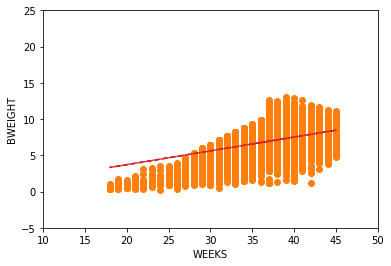

Iteration: 7001,Cost = 0.6387469386248885,weight = [-0.12065585  0.19094555]


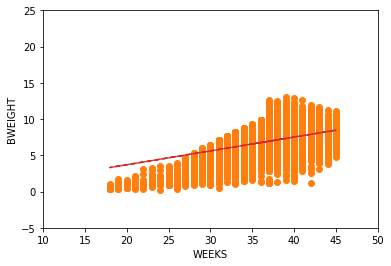

Iteration: 8001,Cost = 0.6384360279358751,weight = [-0.13828269  0.19139871]


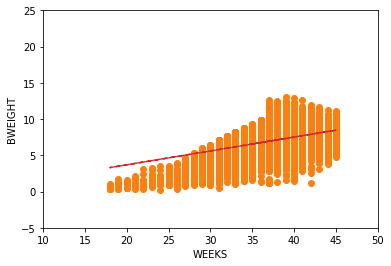

Iteration: 9001,Cost = 0.6381276946300751,weight = [-0.15583632  0.19184999]


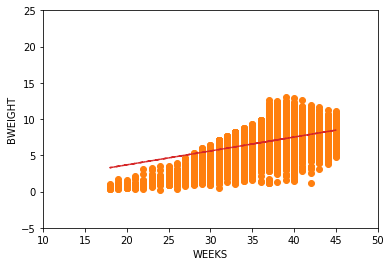

w0 = 10000 
 w1 = 10000
 Costs = 10000


[7.493304673085035,
 2.4073523058544333,
 1.0963193570655914,
 0.7583672497869174,
 0.6712513112202873,
 0.6487947317247365,
 0.6430057354457218,
 0.6415132297967604,
 0.6411282531469169,
 0.6410287700769214,
 0.6410028801911821,
 0.6409959608098569,
 0.64099393155732,
 0.6409931628610396,
 0.640992719107118,
 0.6409923591173119,
 0.6409920207216806,
 0.6409916878946675,
 0.6409913565052092,
 0.640991025488263,
 0.6409906945695054,
 0.6409903636780445,
 0.6409900327956336,
 0.6409897019176062,
 0.6409893710428131,
 0.6409890401707754,
 0.6409887093016391,
 0.6409883784352053,
 0.6409880475714738,
 0.6409877167105235,
 0.6409873858524675,
 0.6409870549970517,
 0.6409867241444412,
 0.6409863932944733,
 0.6409860624473526,
 0.6409857316029347,
 0.6409854007613784,
 0.6409850699223734,
 0.6409847390863956,
 0.6409844082529537,
 0.640984077422323,
 0.6409837465944507,
 0.6409834157693359,
 0.6409830849469895,
 0.6409827541273263,
 0.6409824233103957,
 0.6409820924963888,
 0.6409817616850989

In [24]:
# Another attempt by taking only one feature = WEEKS 
# WEEKS has highest correlation with the BWEIGHT

def predict(x, weight):
    # Compute x.dot(weight)
    return np.dot(x,weight)

def cost(x,weight,Y):
    # Compute mean square error 
    prediction = predict(x,weight)
    return ((prediction - Y)**2).mean()/2

def plot_regressionLine(x,weight,Y):
    
    # Plot the predicted line 
    prediction = predict(x,weight)
    plt.xlim(10,50)
    plt.ylim(-5, 25)
    plt.xlabel('WEEKS')
    plt.ylabel('BWEIGHT')
    plt.plot(x,Y,'o',x, prediction, '--')
    plt.show()


def LR_gradientDescent(learning_rate,epochs):
    
    w0 = []
    w1 = []
    # List to append the costs
    costs = []
    # selected feature which has a linear relationship with the target BWEIGHT
    Feature = babyWeightDF['WEEKS']
    # add bias of 1 in the first column to the actual input values
    x = np.column_stack((np.ones(len(Feature)),Feature))
    # Target Feature 
    Y = babyWeightDF['BWEIGHT']
    weight = np.zeros(2)
    
    for i in range(epochs):
        # Compute prediction
        pred = predict(x,weight)
        # Update the coefficients t0 and t1
        t0 = weight[0] - learning_rate *(pred - Y).mean()
        t1 = weight[1] - learning_rate *((pred - Y)* x[:,1]).mean()
        # Update Weight 
        weight = np.array([t0,t1])
        # MEAN SQUARE ERROR = mse
        mse = cost(x,weight,Y)
        w0.append(t0)
        w1.append(t1)
        costs.append(mse)
        
        # Plot the Linear regression line 
        if i%1000==0:
            print("Iteration: {},Cost = {},weight = {}".format(i+1,mse,weight))
            plot_regressionLine(x,weight,Y)
    print('w0 = {} \n w1 = {}\n Costs = {}'.format(len(w0),len(w1),len(costs)))
    
    return costs

LR_gradientDescent(0.001,10000)

### Predict BWEIGHT target variable for each of the testing dataset using the regression line you deployed above and reporting RMSE(testing) (Root Mean Squared Error)

In [25]:
# Predict Target BWEIGHT Variable using the Weights obtained from training 
def predict_Target(sample, Weights):
    yhat = Weights[0]
    for index in range(len(sample)-1):
        yhat += Weights[index+1]*sample[index]
        return yhat 

def LinearRegression_SGD(trainData,targetData,testData,learning_Rate,noof_epochs, batchSize):
    # List to store the predicted BWEIGHT
    predicted_BWEIGHT = []
    # Compute loss and weight (coefficients) using our gradient descent linear regression
    Loss, Weights = GradientDescent_LinearRegression(trainData,targetData,learning_Rate,noof_epochs,batchSize)
    for sample in testData:
        yhat = predict(sample, Weights[:9])
        predicted_BWEIGHT.append(yhat)
    return (predicted_BWEIGHT)

# Compute the Root Mean Square Error
def RMS_Error(Y, Yhat):
    total = 0
    for i in range(len(Y)):
        # Error = prediction - actual 
        error = Yhat[i]-Y[i]
        # compute the square of error and return square root of its mean
        total += (np.square(error))
    RMSE = np.sqrt(total / float(len(Y)))
    return RMSE

In [26]:
learning_Rate = 0.001
noof_epochs = 60
batchSize = 64
# Call the function to predict the BWEIGHT variables:
predicted_BWEIGHT = LinearRegression_SGD(scaled_X_Train,y_Train,scaled_X_Test,learning_Rate,noof_epochs,batchSize)

[INFO] start training....
[INFO] epoch #1, loss=8.744734227477682
[INFO] epoch #2, loss=8.578875019751946
[INFO] epoch #3, loss=8.450217466331017
[INFO] epoch #4, loss=8.33125296681322
[INFO] epoch #5, loss=8.22089342327966
[INFO] epoch #6, loss=8.118404136140116
[INFO] epoch #7, loss=8.023124870023626
[INFO] epoch #8, loss=7.934458670349347
[INFO] epoch #9, loss=7.851864971509365
[INFO] epoch #10, loss=7.774853552297814
[INFO] epoch #11, loss=7.702979201700922
[INFO] epoch #12, loss=7.635837009684604
[INFO] epoch #13, loss=7.573058207298545
[INFO] epoch #14, loss=7.514306488927755
[INFO] epoch #15, loss=7.459274757331569
[INFO] epoch #16, loss=7.407682239206677
[INFO] epoch #17, loss=7.359271925404317
[INFO] epoch #18, loss=7.313808295648582
[INFO] epoch #19, loss=7.271075292681352
[INFO] epoch #20, loss=7.230874515246476
[INFO] epoch #21, loss=7.193023603270847
[INFO] epoch #22, loss=7.157354792054983
[INFO] epoch #23, loss=7.123713615300574
[INFO] epoch #24, loss=7.091957739426393
[

#### Computing the Root Mean Square Error for Testing 

In [27]:
y_Test = np.array(y_Test)
RMSE_Testing = RMS_Error(y_Test,predicted_BWEIGHT)
print("Root Mean Square Error for Test Data Set:",RMSE_Testing)

Root Mean Square Error for Test Data Set: [4.5670739]


### Running linear regression training again After each run, Report RMSE(testing)


In [28]:
# List to store the RMSE each time the linear regression is run
RMSE_List = []
for i in range(4):
    predicted_BWEIGHT = LinearRegression_SGD(scaled_X_Train,y_Train,scaled_X_Test,0.001,10,64)
    RMSE= RMS_Error(y_Test,predicted_BWEIGHT)
    RMSE_List.append(RMSE)
    print("\n-------------------------------------\n")
    print("Run {} completed and RMSE(testing)= {} ".format(i+1,RMSE))
    print("\n-------------------------------------\n")

[INFO] start training....
[INFO] epoch #1, loss=8.374339165548855
[INFO] epoch #2, loss=8.210029397329626
[INFO] epoch #3, loss=8.085400069416162
[INFO] epoch #4, loss=7.972529954383589
[INFO] epoch #5, loss=7.869864207460005
[INFO] epoch #6, loss=7.776272516507566
[INFO] epoch #7, loss=7.69076566226356
[INFO] epoch #8, loss=7.6124750281238
[INFO] epoch #9, loss=7.5406374050263905
[INFO] epoch #10, loss=7.47458161674898

-------------------------------------

Run 1 completed and RMSE(testing)= [3.31927143] 

-------------------------------------

[INFO] start training....
[INFO] epoch #1, loss=8.320759199737886
[INFO] epoch #2, loss=8.174391979067195
[INFO] epoch #3, loss=8.063519087297848
[INFO] epoch #4, loss=7.962008509044723
[INFO] epoch #5, loss=7.868685503461625
[INFO] epoch #6, loss=7.782737706651398
[INFO] epoch #7, loss=7.7034475153727415
[INFO] epoch #8, loss=7.630177718087083
[INFO] epoch #9, loss=7.562361677270513
[INFO] epoch #10, loss=7.499494750749793

------------------

#### Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test);  Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.  And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [29]:
total = 0.0
N = len(RMSE_List)
# Function to compute mean
def mean(rmse):
    return sum(rmse)/N
# Function to compute the squared sum deviation
def squared_sum (rmse):
    mea = mean(rmse)
    s2s = sum((currentValue - mea)**2 for currentValue in rmse)
    return s2s

# Function to compute the standard deviation
def std_deviation(rmse, ddof = 0):
    
    s2s= squared_sum(rmse)
    variance = s2s/(N-ddof)
    
    return variance**0.5

Avg_RMSE_Test = mean(RMSE_List)
SS_RMSE_Test = squared_sum(RMSE_List)
StdDev_RMSE_Test = std_deviation(RMSE_List)

print("Average RMSE Test: \n", Avg_RMSE_Test)
print("Standard Deviation: RMSE Test \n", StdDev_RMSE_Test)
print("\n-----------------------------------------------\n")
print("Reporting RMSE (testing) = Average: RMSE Test +/- Standard Deviation: RMSE Test")
print("Sum of Average and std deviation of RMSE (test):\n",sum(Avg_RMSE_Test,StdDev_RMSE_Test))
print("\n---------------------------------------------------\n")
print("Result is almost same as the RMSE obtained for Test Data Set previously ")

Average RMSE Test: 
 [3.51828527]
Standard Deviation: RMSE Test 
 [0.24792668]

-----------------------------------------------

Reporting RMSE (testing) = Average: RMSE Test +/- Standard Deviation: RMSE Test
Sum of Average and std deviation of RMSE (test):
 [3.76621195]

---------------------------------------------------

Result is almost same as the RMSE obtained for Test Data Set previously 


#### Baby-Weight-dataset2.csv

#### Peforming all the above preprocessing function again on entire dataset together just to make sure everything is precise

In [30]:
dF = pd.read_csv("baby-weights-dataset2.csv")

x_dF = dF.iloc[:,:36]
x_dF.shape

(101400, 36)

In [31]:
# Add dummy variable to the columns having categorical value in the entire data set
new_DF = pd.get_dummies(x_dF, columns = ['HISPMOM', 'HISPDAD'], drop_first = True)

# Concatinating new columns to old DataFrame

x_dF = pd.concat([ x_dF, new_DF ], axis = 1)

x_dF.shape



(101400, 82)

In [32]:
# Drop the Columns with Categorical Value: 

x_dF.drop('HISPDAD', axis =1, inplace = True)
x_dF.drop('HISPMOM', axis =1, inplace = True)

x_dF.shape

(101400, 80)

In [33]:

# Extract the values from the dataframe
dumm_X= x_dF.values

# Normalize the Dataset
MinMax_Scaler = preprocessing.MinMaxScaler()
norm_X = MinMax_Scaler.fit_transform(dumm_X)

# Replace the missing Values with the mean of the feature
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(norm_X)
X = imputer.transform(norm_X)
print(X.shape)

C:\Users\mrviv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(101400, 80)


In [34]:
Y = dF.iloc[:,36].values
print(Y)

[4.375  6.9375 8.5    ... 7.5    7.625  6.25  ]


In [35]:
def GradDescent_LinearRegression(InputData, TargetData, learning_Rate, noof_Epochs,batchSize):
        
    InputData = np.c_[np.ones((InputData.shape[0])), InputData]
    print("[INFO] start training....")
    
    #print("inputdata",InputData.shape)
    # Initialize weights with random values 
    W = np.random.uniform(size=(InputData.shape[1],))
    
    #print("W",W.shape)
    # Create a list to store the value of loss
    lossHistory = []

    for epoch in range(0, noof_Epochs):

        epochLoss = []

        for (batchX, batchY)  in next_batch(InputData,TargetData,batchSize):

            preds = batchX.dot(W)
 
            error = preds - batchY

            loss= np.sum(error**2)

            loss = np.sqrt(loss)

            #print("[INFO] epoch #{}, loss={}".format(epoch + 1, loss))

            epochLoss.append(loss)
            
            gradient = batchX.T.dot(error)/batchX.shape[0]

            W += -learning_Rate* gradient 
        
        print("[INFO] epoch #{}, loss={}".format(epoch + 1, loss))    
        # Append loss history list by taking average across all batches
        lossHistory.append(np.average(epochLoss))
    
    return lossHistory, W

Loss, Weights = GradDescent_LinearRegression(X,Y,0.0001,80,128) 

[INFO] start training....
[INFO] epoch #1, loss=8.377144065031818
[INFO] epoch #2, loss=7.955383036277568
[INFO] epoch #3, loss=7.76761602606869
[INFO] epoch #4, loss=7.660083207025422
[INFO] epoch #5, loss=7.582204491163686
[INFO] epoch #6, loss=7.51687324031127
[INFO] epoch #7, loss=7.4578882549676475
[INFO] epoch #8, loss=7.40278163929234
[INFO] epoch #9, loss=7.35046304998214
[INFO] epoch #10, loss=7.300395534750013
[INFO] epoch #11, loss=7.252283159686455
[INFO] epoch #12, loss=7.205942437479307
[INFO] epoch #13, loss=7.161245480271185
[INFO] epoch #14, loss=7.118093460625806
[INFO] epoch #15, loss=7.076403737389569
[INFO] epoch #16, loss=7.036103434306686
[INFO] epoch #17, loss=6.99712615872304
[INFO] epoch #18, loss=6.959410277134442
[INFO] epoch #19, loss=6.9228979719186325
[INFO] epoch #20, loss=6.887534693712801
[INFO] epoch #21, loss=6.853268816263167
[INFO] epoch #22, loss=6.820051396531846
[INFO] epoch #23, loss=6.787835991006184
[INFO] epoch #24, loss=6.756578503393566
[I

### Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset

#### Read the CSV file

In [43]:
df_withoutLabel = pd.read_csv("judge-without-labels.csv")
df_withoutLabel.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
0,0,1,1,30,70,11,26,14,16,4,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,21,36,15,18,9,12,1,...,1,0,0,0,0,0,0,0,0,0
2,2,2,1,22,18,10,25,12,12,5,...,0,0,0,0,0,0,0,0,0,0
3,3,2,1,24,25,10,22,12,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1,24,38,15,26,12,12,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
df_withoutLabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 36 columns):
ID          2001 non-null int64
SEX         2001 non-null int64
MARITAL     2001 non-null int64
FAGE        2001 non-null int64
GAINED      2001 non-null int64
VISITS      2001 non-null int64
MAGE        2001 non-null int64
FEDUC       2001 non-null int64
MEDUC       2001 non-null int64
TOTALP      2001 non-null int64
BDEAD       2001 non-null int64
TERMS       2001 non-null int64
LOUTCOME    2001 non-null int64
WEEKS       2001 non-null int64
RACEMOM     2001 non-null int64
RACEDAD     2001 non-null int64
HISPMOM     2001 non-null object
HISPDAD     2001 non-null object
CIGNUM      2001 non-null int64
DRINKNUM    2001 non-null int64
ANEMIA      2001 non-null int64
CARDIAC     2001 non-null int64
ACLUNG      2001 non-null int64
DIABETES    2001 non-null int64
HERPES      2001 non-null int64
HYDRAM      2001 non-null int64
HEMOGLOB    2001 non-null int64
HYPERCH     2001 non-null i

In [45]:
df_withoutLabel.describe()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,...,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,1.492254,1.300850,30.094953,30.305847,12.432284,27.634683,12.900550,13.227886,2.380310,...,0.002499,0.016492,0.054473,0.003498,0.006997,0.004498,0.009995,0.001499,0.003998,0.002499
std,577.783264,0.500065,0.458742,6.878588,13.693736,3.682599,5.985564,2.858952,2.860951,1.549126,...,0.049937,0.127389,0.227005,0.059057,0.083373,0.066931,0.099499,0.038701,0.063119,0.049937
min,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,1.000000,1.000000,25.000000,21.000000,10.000000,23.000000,12.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,1.000000,1.000000,30.000000,30.000000,12.000000,27.000000,12.000000,13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1500.000000,2.000000,2.000000,35.000000,40.000000,15.000000,32.000000,16.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,2.000000,2.000000,61.000000,85.000000,42.000000,48.000000,17.000000,17.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating dummy variables to replace the categorical data

In [46]:
# Creating Dummy Variables for HISPMOM and HISPDAD
# First dummy variable column is dropped to prevent dummy variable trap
# for K categorical variable , k-1 dummy variables are needed
dummyCol_DF = pd.get_dummies(df_withoutLabel, columns = ['HISPMOM', 'HISPDAD'], drop_first = True)
# Concatinating new columns to old DataFrame
df_withoutLabel = pd.concat([df_withoutLabel, dummyCol_DF ], axis = 1)


In [47]:
# Dropping the columns with categorical values: 
df_withoutLabel.drop('HISPDAD', axis =1, inplace = True)
df_withoutLabel.drop('HISPMOM', axis =1, inplace = True)
# Display the new DataFrame
print(df_withoutLabel.head())
print(df_withoutLabel.shape)

   ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  \
0   0    1        1    30      70      11    26     14     16       4   
1   1    2        2    21      36      15    18      9     12       1   
2   2    2        1    22      18      10    25     12     12       5   
3   3    2        1    24      25      10    22     12     11       4   
4   4    2        1    24      38      15    26     12     12       1   

     ...      HISPMOM_N  HISPMOM_O  HISPMOM_P  HISPMOM_S  HISPDAD_M  \
0    ...              1          0          0          0          0   
1    ...              1          0          0          0          0   
2    ...              0          0          0          1          0   
3    ...              1          0          0          0          0   
4    ...              1          0          0          0          0   

   HISPDAD_N  HISPDAD_O  HISPDAD_P  HISPDAD_S  HISPDAD_U  
0          1          0          0          0          0  
1          1    

#### Removing any Null values 

In [48]:
x = df_withoutLabel.values
# Replace the missing Values with the mean of the feature
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(x)
x = imputer.transform(x)
print(x.shape)

(2001, 78)


#### Normalizing the data set

In [49]:
#MinMaxScaler:-
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# Features are transformed by scaling each feature to given range. 
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_X = MinMax_Scaler.fit_transform(x)
print("Shape of Scaled/Normalized data from judge-without-label:",scaled_X.shape)

Shape of Scaled/Normalized data from judge-without-label: (2001, 78)


### Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv

In [51]:
import csv
Pred_BWEIGHT = []
for sample in scaled_X:
    yhat = predict(sample, Weights[:78])
    Pred_BWEIGHT.append(yhat)

df_withoutLabel = pd.read_csv("judge-without-labels.csv")
#print(len(Pred_BWEIGHT))
df_withoutLabel['BWEIGHT'] = Pred_BWEIGHT

submission_df = df_withoutLabel[['ID', 'BWEIGHT']].to_csv('judge-submission-run2.csv', index = False, quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
|